## Observations and Insights 

In [154]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
joined_df = mouse_metadata.merge(study_results, on="Mouse ID", how="outer",)
joined_df["Tumor Volume (mm3)"] = pd.to_numeric(joined_df["Tumor Volume (mm3)"])
# Display the data table for preview
joined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [155]:
# Checking the number of mice
len(joined_df["Mouse ID"].unique())

249

In [156]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

joined_df["mouse/timepoint dupe"] = joined_df.duplicated(subset=["Mouse ID", "Timepoint"])

dupe_mouse = joined_df["Mouse ID"].loc[joined_df["mouse/timepoint dupe"] == True].unique()
dupe_freq = joined_df["Mouse ID"].loc[joined_df["mouse/timepoint dupe"] == True].value_counts()

dupe_summary = pd.DataFrame({
    "Mouse ID": dupe_mouse,
    "Number of Duplicate Data": dupe_freq
})

dupe_mice_summary = dupe_summary.set_index("Mouse ID")
dupe_mice_summary

,Number of Duplicate Data
Mouse ID,
g989,5


In [157]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_data = joined_df[joined_df["Mouse ID"].isin(dupe_mouse)]
dupe_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,mouse/timepoint dupe
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [158]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_vs_cancer  = joined_df.drop(joined_df[joined_df["Mouse ID"].isin(dupe_mouse)].index)
mice_vs_cancer = mice_vs_cancer.drop("mouse/timepoint dupe", axis = 1)
mice_vs_cancer

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [159]:
# Checking the number of mice in the clean DataFrame.
len(mice_vs_cancer["Mouse ID"].unique())

248

## Summary Statistics

In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_drug = mice_vs_cancer.groupby("Drug Regimen")

drugs = mice_vs_cancer["Drug Regimen"].unique()

regimen_mean = []
regimen_median = []
regimen_variance = [] 
regimen_stdev = []
regimen_sem  = []

np.median(mice_vs_cancer["Tumor Volume (mm3)"].loc[mice_vs_cancer["Drug Regimen"] == drugs[0]])


for drug in drugs:
    
    reg_mean = np.mean(mice_vs_cancer["Tumor Volume (mm3)"].loc[mice_vs_cancer["Drug Regimen"] == drug])
    regimen_mean.append(reg_mean)
    
    reg_median = np.median(mice_vs_cancer["Tumor Volume (mm3)"].loc[mice_vs_cancer["Drug Regimen"] == drug])
    regimen_median.append(reg_median)
    
    reg_var = mice_vs_cancer["Tumor Volume (mm3)"].loc[mice_vs_cancer["Drug Regimen"] == drug].var()
    regimen_variance.append(reg_var)

    reg_stdev = np.std(mice_vs_cancer["Tumor Volume (mm3)"].loc[mice_vs_cancer["Drug Regimen"] == drug])
    regimen_stdev.append(reg_stdev)

    reg_sem = st.sem(mice_vs_cancer["Tumor Volume (mm3)"].loc[mice_vs_cancer["Drug Regimen"] == drug])
    regimen_sem.append(reg_sem)
    

regimen_summary = pd.DataFrame({"Drug Regimen": drugs,
                                "Mean": regimen_mean,
                                "Median" : regimen_median,
                                "Variance" : regimen_variance,
                                "Standard Deviation" :regimen_stdev,
                                "Standard Error of the Mean" : regimen_sem
})
    
regimen_summary = regimen_summary.set_index("Drug Regimen")
regimen_summary.index.name = None

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupby_drug = mice_vs_cancer.groupby("Drug Regimen")
gb_regimen_mean = groupby_drug["Tumor Volume (mm3)"].mean()
gb_regimen_median = groupby_drug["Tumor Volume (mm3)"].median()
gb_regimen_variance = groupby_drug["Tumor Volume (mm3)"].var()
gb_regimen_stdev = groupby_drug["Tumor Volume (mm3)"].std()
gb_regimen_sem = groupby_drug["Tumor Volume (mm3)"].sem()

gb_regimen_summary = pd.DataFrame({"Mean": gb_regimen_mean,
                                   "Median" : gb_regimen_median,
                                   "Variance" : gb_regimen_variance,
                                   "Standard Deviation" : gb_regimen_stdev,
                                   "Standard Error of the Mean" : gb_regimen_sem
                                  })
gb_regimen_summary.index.name = None
gb_regimen_summary

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [161]:
# Using the aggregation method, produce the same summary statistics in a single line
mice_vs_cancer.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]).rename(columns={"mean":"Mean","median":"Meadian","var":"Variance","std":"Standard Devuation","sem":"Standard Error of the Mean"})

,Mean,Meadian,Variance,Standard Devuation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

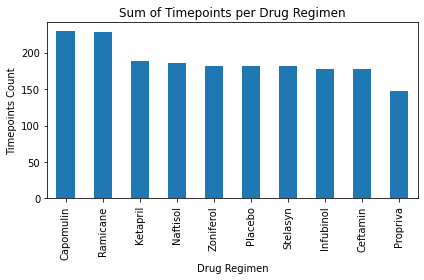

In [162]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_vs_cancer["Drug Regimen"].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Count")
plt.title("Sum of Timepoints per Drug Regimen")
plt.tight_layout()

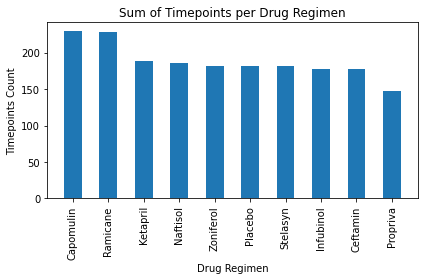

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_timepoint_values = mice_vs_cancer["Drug Regimen"].value_counts()
drug_timepoint_keys = mice_vs_cancer["Drug Regimen"].value_counts().keys().tolist()

plt.bar(drug_timepoint_labels, drug_timepoint_values, width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Count")
plt.title("Sum of Timepoints per Drug Regimen")
plt.xticks(rotation=90)
plt.tight_layout()

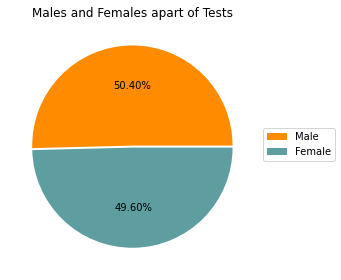

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_count = len(mice_vs_cancer["Mouse ID"].loc[mice_vs_cancer["Sex"] == "Male"].unique()) 
female_count = len(mice_vs_cancer["Mouse ID"].loc[mice_vs_cancer["Sex"] == "Female"].unique())

male_female_df = pd.DataFrame({'Count': [male_count,female_count]},
                  index=['Male', 'Female'])

colors = ["darkorange", "cadetblue"]
gender_pie = df.plot.pie(y="Count", colors = colors, autopct='%1.2f%%', explode = explode, labels=["",""])
plt.legend(loc="best",bbox_to_anchor=(1,0.6),labels=male_female_df.index)
plt.title("Males and Females apart of Tests")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()

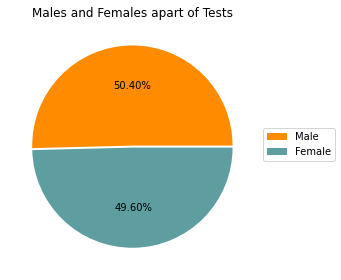

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["darkorange", "cadetblue"]
plt.pie([male_count,female_count], explode=explode, labels=["", ""], colors=colors, autopct="%1.2f%%")
plt.legend(loc="best",bbox_to_anchor=(1,0.6),labels=male_female_df.index)
plt.title("Males and Females apart of Tests")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [196]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mice_vs_cancer["endpoint"] = mice_vs_cancer.duplicated(subset=(["Mouse ID"]),keep="last")
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_endpoint = mice_vs_cancer[mice_vs_cancer["endpoint"] == False]

In [215]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_tank = []

for treat in treatments:
    tumor_vol = mice_endpoint["Tumor Volume (mm3)"]
    tumor_vol_tank.append(tumor_vol)
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quart_drug_df = mice_endpoint[(mice_endpoint["Drug Regimen"] == "Capomulin")|
                              (mice_endpoint["Drug Regimen"] == "Ramicane")|
                              (mice_endpoint["Drug Regimen"] == "Infubinol")|
                              (mice_endpoint["Drug Regimen"] == "Ceftamin")]


final4_tumor_volumes = quart_drug_df["Tumor Volume (mm3)"]

quartiles = final4_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles,lowerq,upperq,iqr,st.normaltest(final4_tumor_volumes)

(0.25    37.187744
 0.50    45.000000
 0.75    59.930262
 Name: Tumor Volume (mm3), dtype: float64,
 37.1877438025,
 59.930261755,
 22.742517952499995,
 NormaltestResult(statistic=31.29201842881803, pvalue=1.603335964565418e-07))

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
